In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
samples_sizes = [10, 100, 1000]

In [3]:
runs = 1000

In [4]:
mu = 3.5
std_err = lambda n: 1.71/np.sqrt(n)

In [5]:
plt.style.use('seaborn-white')

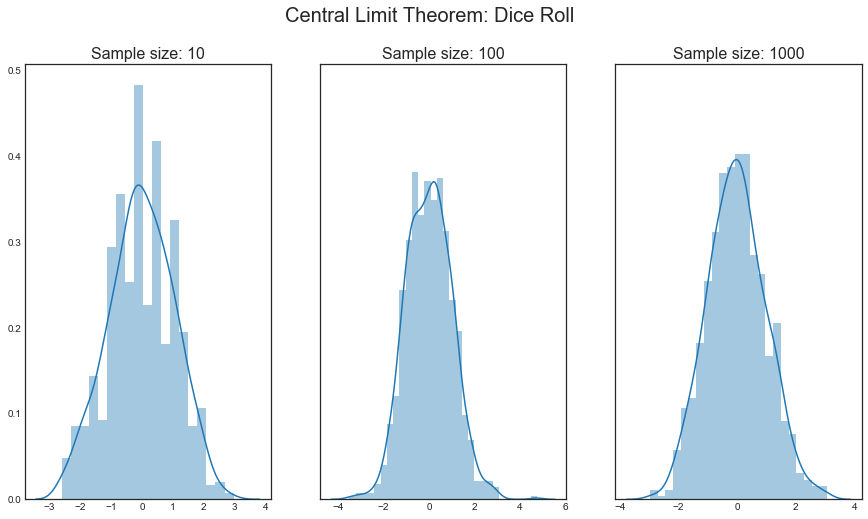

In [6]:
fig, ax = plt.subplots(ncols=len(samples_sizes), figsize=(15,8), sharey=True)

fig.suptitle('Central Limit Theorem: Dice Roll', fontsize=20)

for i, sample_size in enumerate(samples_sizes):
    means = [np.random.choice(range(1,7), size=sample_size).mean() for _ in range(runs)]

    zs = [(mean-mu)/std_err(sample_size) for mean in means]

    sns.distplot(zs, kde=True, ax=ax[i])

    ax[i].set_title('Sample size: {}'.format(sample_size), fontsize=16)

fig.savefig('central-limit-theorem1.png')

In [7]:
probs = [0.1, 0.5, 0.9]

In [18]:
mu_ = lambda i: probs[i]
std_err_ = lambda mu, n: np.sqrt((mu*(1-mu))/n)

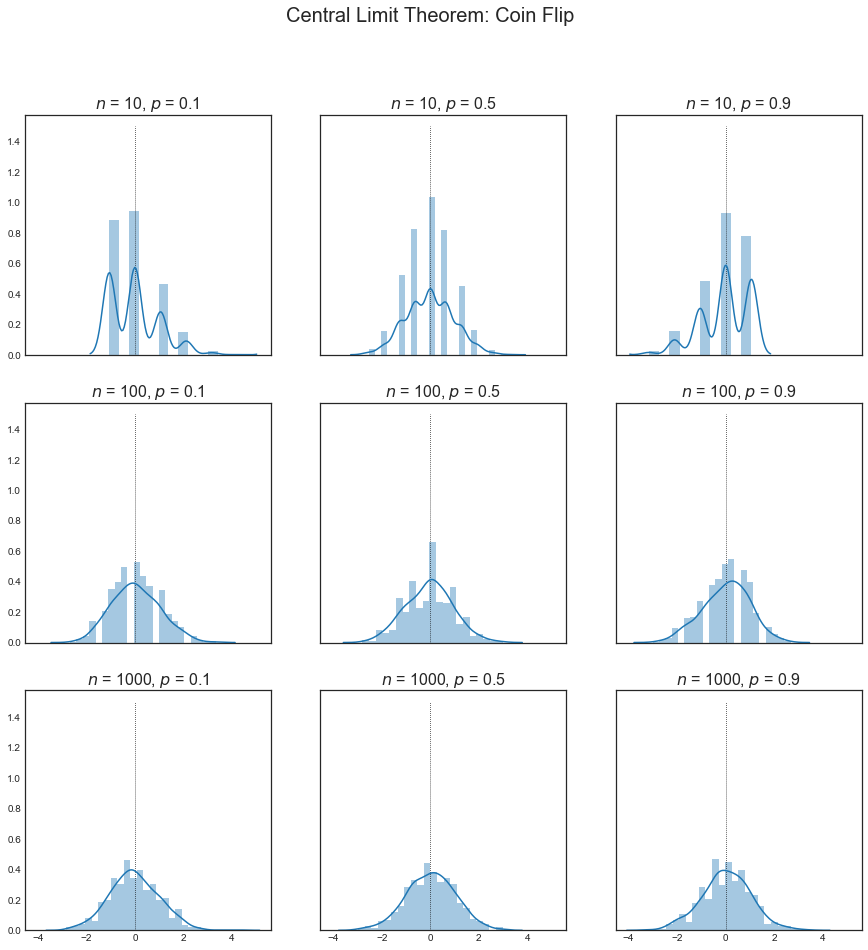

In [26]:
fig, ax = plt.subplots(ncols=len(samples_sizes), nrows=len(probs), sharey=True, sharex=True, figsize=(15,15))

fig.suptitle('Central Limit Theorem: Coin Flip', fontsize=20)

for i, sample_size in enumerate(samples_sizes):
    for j, prob in enumerate(probs):
        means = [np.random.choice([0,1], p=[1-prob, prob], size=sample_size).mean() for _ in range(runs)]

        zs = [(mean-mu_(j))/std_err_(mu_(j), sample_size) for mean in means]

        sns.distplot(zs, kde=True, ax=ax[i,j])
        ax[i,j].vlines(x=0.0, ymin=0, ymax=1.5, linewidth=0.75, linestyle='dotted')

        ax[i,j].set_title('$n$ = {}, $p$ = {}'.format(sample_size, prob), fontsize=16)

fig.savefig('central-limit-theorem2.png')